In [15]:
##Load Dataset & Explore Structure

In [16]:
import pandas as pd
from sklearn.datasets import load_iris

# Example using built-in dataset; replace with pd.read_csv("your_data.csv") for custom data
iris = load_iris(as_frame=True)
df = iris.frame
# Quick look at first five rows
print(df.head())
# Column data types
print(df.info())      
print(df.describe()) 


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float

In [17]:
##Handle Missing Values

In [18]:
# Check missing values
print(df.isnull().sum())

# Impute numerical features with median (robust against outliers)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df[df.columns[:-1]] = imputer.fit_transform(df[df.columns[:-1]])


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [19]:
 ##Encode Categorical Variables

In [20]:
from sklearn.preprocessing import OneHotEncoder

# Example: Suppose 'species' is categorical, otherwise skip for all-numeric datasets
encoder = OneHotEncoder(sparse_output=False, drop='first')
# drop for reference avoidance
species_encoded = encoder.fit_transform(df[['target']])


In [21]:
##Normalize / Scale Numerical Features

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])


In [23]:
##Split Data

In [24]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:-1]]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [25]:
 ##Choose and Train a Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [27]:
##Cross-Validation

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy: %.2f%% +/- %.2f" % (scores.mean() * 100, scores.std() * 100))


Cross-validation Accuracy: 95.00% +/- 1.67


In [29]:
##Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy: %.2f%%" % (grid.best_score_ * 100))


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 95.83%


In [31]:
##Evaluation Metrics

Accuracy: 0.9666666666666667
Precision: 0.9696969696969696
Recall: 0.9666666666666667
F1 Score: 0.9665831244778613


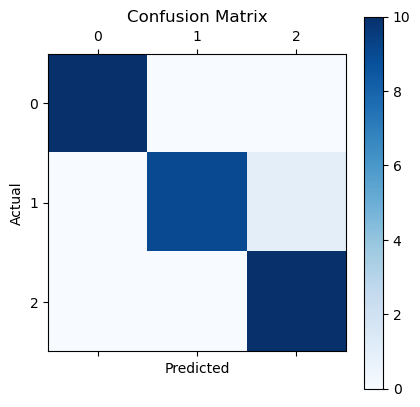

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

y_pred = grid.predict(X_test)
y_proba = grid.predict_proba(X_test)[:, 1] if hasattr(grid, "predict_proba") else None

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# If binary classification or appropriate multi-class handling
if y_proba is not None and len(set(y_test)) == 2:
    print("ROC AUC:", roc_auc_score(y_test, y_proba))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

# Confusion Matrix
plt.matshow(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [33]:
##Pipeline Integration

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# If you have categorical columns, setup transformers accordingly
preprocessor = ColumnTransformer(
    transformers=[
        # Example: numeric and categorical
        ('num', StandardScaler(), X.columns),  # List only numeric columns here
        # ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        # uncomment if categorical
    ]
)

pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(**grid.best_params_))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(min_samples_split=5))])